In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 


/home/musa/protein-dihedral-visualization/lib/plotting.py:268: RuntimeWarning: Mean of empty slice
  X = np.where(np.isnan(X), np.nanmean(X,axis=0), X)


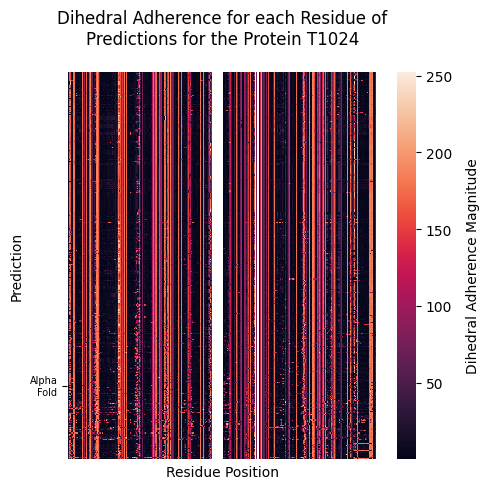

Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|   339 |        326 | LGADLMN    |  149.618  |   2.44246 |  147.176  |
|   340 |        327 | GADLMNP    |  174.968  |  31.5597  |  143.408  |
|   207 |        200 | FQAYKTV    |  158.821  |  17.3671  |  141.453  |
|   189 |        189 | MTETFKP    |  193.846  |  54.0102  |  139.836  |
|   164 |        164 | RPAFEAL    |  147.224  |  20.1562  |  127.068  |
|   311 |        298 | LTTTFTP    |  131.338  |  26.2987  |  105.04   |
|   208 |        201 | QAYKTVL    |  114.749  |  20.0613  |   94.6878 |
|    24 |         24 | AFSYGTV    |  135.568  |  58.56    |   77.0081 |
|   342 |        329 | DLMNPEK    |   66.5001 |   1.6989  |   64.8012 |
|   345 |        332 | NPEKIGS    |  168.546  | 105.058   |   63.4877 |


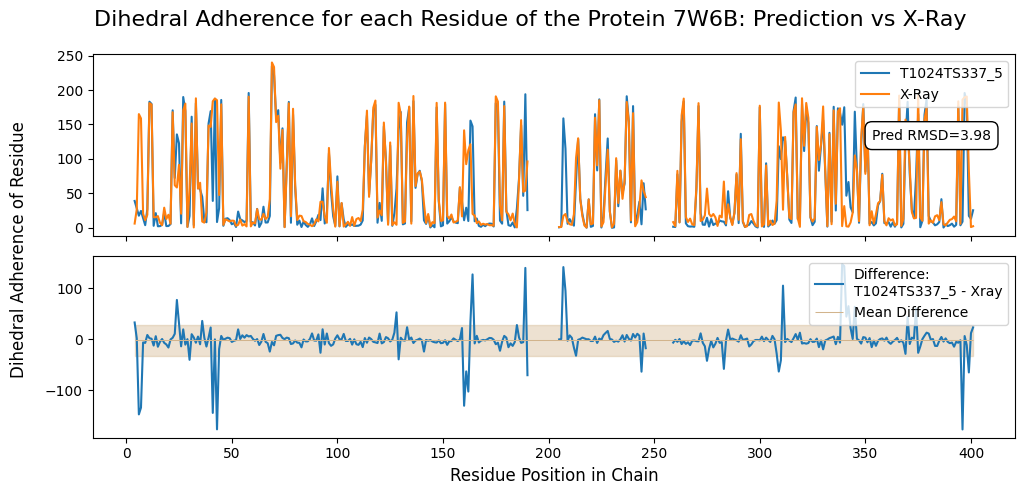

In [15]:
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1024'   # 6ya2
# proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']

da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
# da.test_pdbmine_conn()
da.compute_structures(replace=False)
da.query_pdbmine()

# da.load_results()
# da.compute_das(replace=True)
da.load_results_da()
# da.check_alignment()
# da.plot_da_for_seq(i=95)
# da.plot_one_dist_3d(i=95)
da.plot_heatmap(fillna=False)
both = da.plot_res_vs_da()
# both = da.plot_res_vs_da(pred_id=da.get_id('427_1'))
# da.plot_da_vs_rmsd()
# da.split_and_compute_rmsd(print_alignment=False)
# da.split_and_compute_rmsd(pred_id=da.get_id('304_1'), split=[(402,441)])
# da.split_and_compute_rmsd(split=[(100,104),(180,174)])

In [ ]:
da.plot_res_vs_da()

In [ ]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053']:
    da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
    da.query_pdbmine()
    da.compute_structures(replace=True)
    da.compute_das(replace=True)

In [ ]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053']:
    da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
    # da.query_pdbmine()
    # da.compute_structures(replace=True)
    da.load_results()
    da.compute_das(replace=True)

In [ ]:
targetlist = pd.read_csv('targetlist.csv', sep=';')
for target in targetlist.Target.unique():
    try:
        da = DihedralAdherence(target, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    except ValueError as e:
        print(f'Skipping {target}: {e}')
    da.compute_structures()
    da.query_pdbmine()
    da.compute_mds()

In [ ]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053'], 
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds)

In [ ]:
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053']

xray_phi_psi = []
af_phi_psi = []
all_phi_psi = []
for id in casp_protein_ids:
    da = DihedralAdherence(id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
    da.load_results_da()
    xray_phi_psi.append(da.xray_phi_psi.dropna())
    print(xray_phi_psi[-1].shape)
    af_phi_psi.append(da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.alphafold_id].dropna())
    print(af_phi_psi[-1].shape)
    all_phi_psi.append(da.phi_psi_predictions.dropna())
    print(all_phi_psi[-1].shape)

xray_phi_psi = pd.concat(xray_phi_psi).reset_index(drop=True)
af_phi_psi = pd.concat(af_phi_psi).reset_index(drop=True)
all_phi_psi = pd.concat(all_phi_psi).reset_index(drop=True)

In [ ]:
xray_phi_psi['da'] = xray_phi_psi['da'] % 180
af_phi_psi['da'] = af_phi_psi['da'] % 180
all_phi_psi['da'] = all_phi_psi['da'] % 180

In [ ]:
xray_phi_psi.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_palette("pastel")
sns.kdeplot(data=xray_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
ax.set_title('Distribution of Distance from X-ray Dihedral Angles to PDBMine Prediction')
ax.set_xlabel('Distance')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=af_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
ax.set_title('Distribution of Distance from AlphaFold Dihedral Angles to PDBMine Prediction')
ax.set_xlabel('Distance')
plt.show()

In [ ]:
all_phi_psi['target'] = all_phi_psi.protein_id.apply(lambda x: x[:5])
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=all_phi_psi, x='da', fill=True, hue='target', ax=ax, multiple="stack")
ax.set_title('Distribution of Distance from All Predicted Dihedral Angles to PDBMine Prediction')
ax.set_xlabel('Distance')
plt.show()

In [ ]:
sns.set_palette('tab10')
xray_phi_psi['Source'] = 'X-ray'
af_phi_psi['Source'] = 'AlphaFold'
all_phi_psi['Source'] = 'All Other Predictions'
df = pd.concat([
    xray_phi_psi.sample(3100), 
    af_phi_psi.drop('da_na', axis=1).sample(3100),
    all_phi_psi.sample(3100)
]).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=True)
ax.set_title('Distribution of Distance from Dihedral Angles to PDBMine Prediction')
ax.set_xlabel('Distance')
plt.show()